In [1]:
import math
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline

# Useful directory path.
root_dir = f'{os.getcwd()}/../results'

# Function sets.
function_sets = {
    'nicolau_a': (4, 7, 255, 2),
    'nicolau_b': (6, 5, 63, 1),
    'nicolau_c': (9, 5, 63, 1)
}

# Numbers of fitness cases.
num_fitness_cases = (10, 100, 1000, 10000)

# Program dictionary.
with open(f'{root_dir}/programs/programs.pkl', 'rb') as f:
    program_dict = pickle.load(f) 

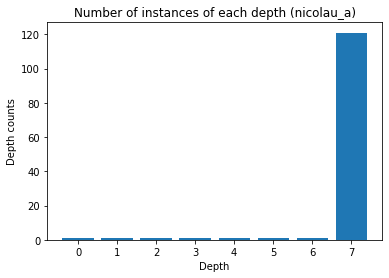

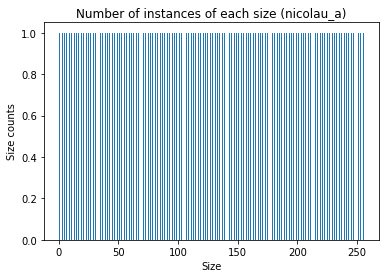

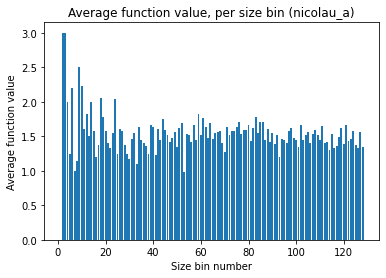

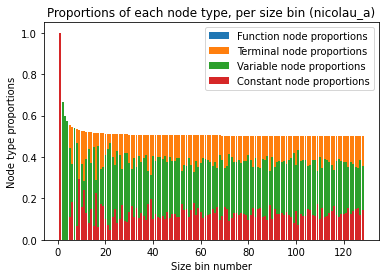

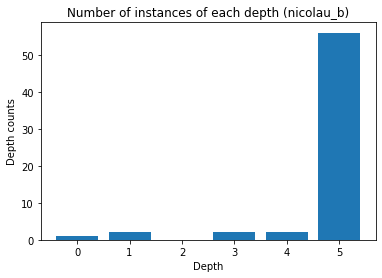

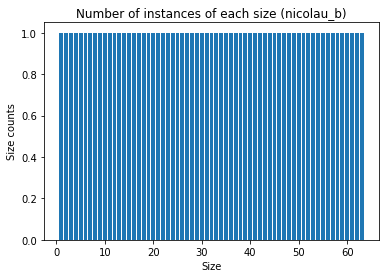

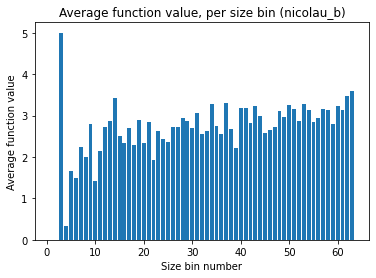

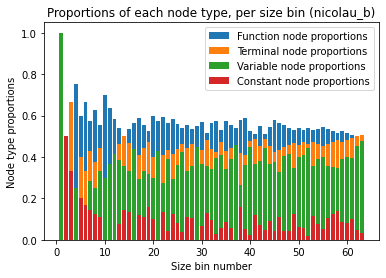

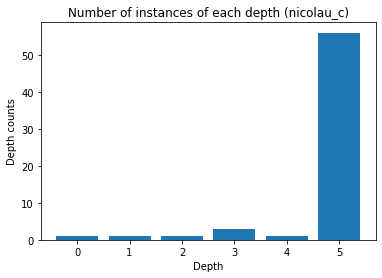

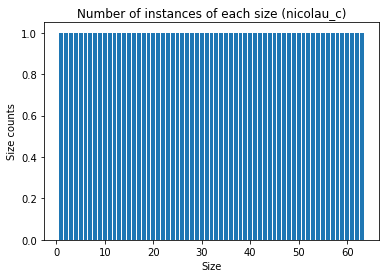

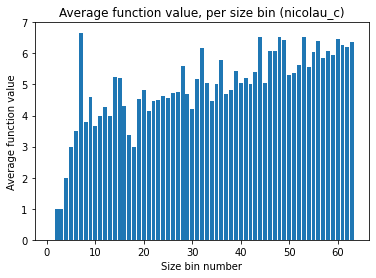

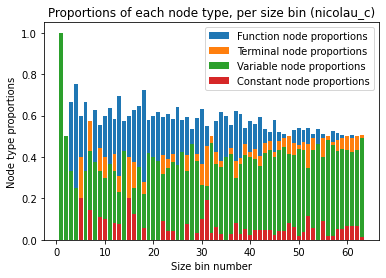

In [2]:
# Compute some statistics for the set of random programs
# generated for each function set.

# Program sizes for each size bin, for each function set.
program_sizes = []

for name, (num_functions, max_depth, max_size, bin_size) in (
    function_sets.items()):
    # For each function set...

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # List where the `i`-th element, `0 <= i <= max_depth`, 
    # is to represent the number of instances for depth `i` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    depth_counts = [0]*(max_depth+1)

    # List where the `i`-th element, `0 <= i <= max_size-1`, 
    # is to represent the number of instances for size `i+1` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    size_counts = [0]*(max_size)

    # Lists where the `i`-th element contains the proportion
    # of the total number of nodes for size bin `i` that are 
    # functions/variables/constants/terminals.
    function_node_proportions = []
    variable_node_proportions = []
    constant_node_proportions = []
    terminal_node_proportions = []
    
    # List where the `i`-th element is to represent the 
    # "average function value" for size bin `i`, where 
    # this value is defined here to be the sum of the 
    # numbers of instances of each function type, with 
    # the `i`-th function type (specified by the `function_
    # counts` list) multiplied by `i`, all divided by the 
    # number of function types.
    #
    # In general, if the numbers of instances of function 
    # types are uniformly distributed for each size bin, 
    # the "average function value" as defined above should 
    # be equal to the number of function types minus one,
    # divided by 2. Thus, we can check for such uniformity
    # for each size bin by inspecting such an average value.
    average_function_values = []

    # Prepare for sizes related to the function set.
    program_sizes.append([])

    # Compute the relevant list elements.
    for (programs, depths, sizes, function_counts, 
        variable_counts, constant_counts) in (program_dict[name]
            [0:num_size_bins]):

        for depth in depths: depth_counts[depth] += 1
        for size in sizes: size_counts[size-1] += 1

        function_node_sum = sum(function_counts)
        variable_node_sum = sum(variable_counts)
        constant_node_sum = sum(constant_counts)
        terminal_node_sum = variable_node_sum + constant_node_sum
        node_sum = function_node_sum + terminal_node_sum

        function_node_proportions.append(function_node_sum/node_sum)
        variable_node_proportions.append(variable_node_sum/node_sum)
        constant_node_proportions.append(constant_node_sum/node_sum)
        terminal_node_proportions.append(terminal_node_sum/node_sum)
 
        average_function_value = (0) if (function_node_sum == 0) else (
            sum([i*function_counts[i] for i in range(
                num_functions)])/function_node_sum)

        average_function_values.append(average_function_value)

        # Add representative size from size bin.
        program_sizes[-1].append(sizes[0])

    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program depth.

    # print('Program depths: ', depth_counts)
    # print('Mean of depth counts: ', np.mean(depth_counts))
    # print('Variance of depth counts: ', np.var(depth_counts))
    # print('Standard deviation of depth counts: ', np.std(depth_counts))
    # print(stats.chisquare(depth_counts))

    # Plot bar graph of depth counts.
    index = range(0, max_depth+1)
    plt.bar(index, depth_counts)
    plt.xlabel('Depth')
    plt.ylabel('Depth counts')
    plt.title('Number of instances of each depth ('+name+')')

    plt.show()


    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program size.

    # print('Program sizes: ', size_counts)
    # print('Mean of size counts: ', np.mean(size_counts))
    # print('Variance of size counts: ', np.var(size_counts))
    # print('Standard deviation of size counts: ', np.std(size_counts))
    # print(stats.chisquare(size_counts))

    # Plot bar graph of size counts.
    index = range(1, max_size+1)
    plt.bar(index, size_counts)
    plt.xlabel('Size')
    plt.ylabel('Size counts')
    plt.title('Number of instances of each size ('+name+')')

    plt.show()


    # Compute/plot some relevant statistics for the average
    # function values.

    # print('Average function values: ', average_function_values)
    # print('Mean of average function values: ', 
    #     np.mean(average_function_values))
    # print('Variance of average function values: ', 
    #     np.var(average_function_values))
    # print('Standard deviation of average function values: ', 
    #     np.std(average_function_values))
    # print(stats.chisquare(average_function_values))

    # Plot bar graph of average function values.
    index = range(1, num_size_bins+1)

    #log_approx = [4*(1/log(max_size,2))*log(max_size/x,2) + 
    #    10.5*(1/log(max_size,2))*log(x, 2) for x in index]

    #plt.plot(index, log_approx)
    plt.bar(index, average_function_values)

    plt.xlabel('Size bin number')
    plt.ylabel('Average function value')
    plt.title('Average function value, per size bin ('+name+')')

    plt.show()


    # Compute/plot some relevant statistics for proportions
    # of the total number of nodes with particular node types.

    # print('Function node proportions: ', function_node_proportions)
    # print('Terminal node proportions: ', terminal_node_proportions)
    # print('Variable node proportions: ', variable_node_proportions)
    # print('Constant node proportions: ', constant_node_proportions)


    # Plot bar graph of function counts.
    index = range(1, num_size_bins+1)
    plt.bar(index, function_node_proportions, 
        label='Function node proportions')
    plt.bar(index, terminal_node_proportions, 
        label='Terminal node proportions')
    plt.bar(index, variable_node_proportions, 
        label='Variable node proportions')
    plt.bar(index, constant_node_proportions, 
        label='Constant node proportions')
    plt.xlabel('Size bin number')
    plt.ylabel('Node type proportions')
    plt.title('Proportions of each node type, per size bin ('+name+')')
    plt.legend(loc='upper right')

    plt.show()

In [3]:
####################################################################

# Compute some statistics for DEAP.

with open(f'{root_dir}/results_deap.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

# Average of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
avg_med_avg_runtimes = []

# Median of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
med_med_avg_runtimes = []

# Minimum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
min_med_avg_runtimes = []

# Maximum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
max_med_avg_runtimes = []

# Standard deviation of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set.
std_dev_med_avg_runtimes = []

# Interquartile range of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set.
iqr_med_avg_runtimes = []

# Median node evaluations per second (NEPS) for each size bin,
# for each number of fitness cases, for each function set.
med_neps = []

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes.append([])
    med_med_avg_runtimes.append([])
    min_med_avg_runtimes.append([])
    max_med_avg_runtimes.append([])
    std_dev_med_avg_runtimes.append([])
    iqr_med_avg_runtimes.append([])
    med_neps.append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1])
        print('\n\n')

        print('Program sizes:', program_sizes[i])

        # Median node evaluations per second for each size bin, 
        # relevant to the number of fitness cases.
        med_neps[-1].append([((size * nfc) / med)
            for size, med in zip(
                program_sizes[i], med_med_avg_runtimes[-1][-1])])
        print('Median node evaluations per second:', med_neps[-1][-1])
        print('\n')


# # Plot graph of median node evaluations per second, 
# # for each function set.
# for i, (name, (function_set, max_depth, bin_size)) in enumerate(
#     function_sets.items()):

#     # Maximum arity for function set.
#     max_arity = max([arity for _, arity in function_set])

#     # Maximum program size for function set.
#     max_possible_size = get_max_size(max_arity, max_depth)

#     # Number of size bins.
#     num_size_bins = int(math.ceil(max_possible_size/bin_size))

#     # Index range for plot.
#     index = range(1, num_size_bins+1)

#     # Plot for function set.
#     # plt.plot(index, [size*nfc for size in sizes[i]])
#     plt.plot(index, med_neps[i], label=f'Function set {name}')
#     # plt.plot(index, [0.00000676*x+0.00009423622 for x in index])

# plt.xlabel('Size bin number')
# plt.ylabel('Median of node evaluations per second')
# plt.title('Median of node evaluations per second vs. size bin number')
# plt.legend(loc='upper left')

# plt.show()

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.00043988507241010666, 0.0004628036792079608, 0.0004922629644473394, 0.0005060968299706777, 0.000525057315826416, 0.0005499720573425293, 0.000524164487918218, 0.0005575415367881457, 0.0005995236958066622, 0.0006070475404461225, 0.0006119258080919584, 0.0006299391388893127, 0.0006396140282352766, 0.0006696858132878939, 0.0006884392350912094, 0.0007043310130635897, 0.0007150182500481606, 0.0007509797190626463, 0.000763289009531339, 0.0007405802607536316, 0.0007575058067838351, 0.0007802890613675117, 0.0008047651499509811, 0.0008213215818007787, 0.0008269033084313074, 0.0008646563316384951, 0.0008785491809248924, 0.0008709806328018507, 0.0008868932103117307, 0.0008930681894222895, 0.0009313179180026054, 0.0009213006123900414, 0.0009267743056019148, 0.0009589949622750282, 0.000990247664352258, 0.0009774758170048397, 0.0009886746605237324, 0.0010145511478185654, 0.0010506371036171913, 

In [4]:
####################################################################

# Compute some statistics for TensorGP.

with open(f'{root_dir}/results_tensorgp.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

# Average of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
avg_med_avg_runtimes = []

# Median of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
med_med_avg_runtimes = []

# Minimum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
min_med_avg_runtimes = []

# Maximum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set.
max_med_avg_runtimes = []

# Standard deviation of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set.
std_dev_med_avg_runtimes = []

# Interquartile range of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set.
iqr_med_avg_runtimes = []

# Median node evaluations per second (NEPS) for each size bin,
# for each number of fitness cases, for each function set.
med_neps = []

for i, device in enumerate(('CPU', 'GPU')):
    # For each device...
    print(f'For device `{device}`...')

    # Prepare for statistics related to the device.
    avg_med_avg_runtimes.append([])
    med_med_avg_runtimes.append([])
    min_med_avg_runtimes.append([])
    max_med_avg_runtimes.append([])
    std_dev_med_avg_runtimes.append([])
    iqr_med_avg_runtimes.append([])
    med_neps.append([])

    for j, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
        function_sets.items()):
        # For each function set...
        print(f'For function set `{name}`...')

        # Number of "size bins."
        num_size_bins = int(math.ceil(max_size/bin_size))

        # Prepare for statistics related to the function set.
        avg_med_avg_runtimes[-1].append([])
        med_med_avg_runtimes[-1].append([])
        min_med_avg_runtimes[-1].append([])
        max_med_avg_runtimes[-1].append([])
        std_dev_med_avg_runtimes[-1].append([])
        iqr_med_avg_runtimes[-1].append([])
        med_neps[-1].append([])

        for k, nfc in enumerate(num_fitness_cases):
            # For each number of fitness cases...
            print(f'For number of fitness cases `{nfc}`...')


            # Average of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            avg_med_avg_runtimes[-1][-1].append(
                [np.mean(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Averages of median average runtimes:', 
                avg_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Median of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            med_med_avg_runtimes[-1][-1].append(
                [np.median(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Medians of median average runtimes:', 
                med_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Minimum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            min_med_avg_runtimes[-1][-1].append(
                [min(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Minimums of median average runtimes:', 
                min_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Maximum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            max_med_avg_runtimes[-1][-1].append(
                [max(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Maximums of median average runtimes:', 
                max_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Standard deviation of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            std_dev_med_avg_runtimes[-1][-1].append(
                [np.std(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Standard deviations of median average runtimes:', 
                std_dev_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Interquartile range of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            iqr_med_avg_runtimes[-1][-1].append(
                [stats.iqr(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Interquartile range of median average runtimes:', 
                iqr_med_avg_runtimes[-1][-1][-1])
            print('\n\n')

            print('Program sizes:', program_sizes[i])

            # Median node evaluations per second for each size bin, 
            # relevant to the number of fitness cases.
            med_neps[-1][-1].append([((size * nfc) / med)
                for size, med in zip(
                    program_sizes[j], med_med_avg_runtimes[-1][-1][-1])])
            print('Median node evaluations per second:', med_neps[-1][-1][-1])
            print('\n')

For device `CPU`...
For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.0003753689428170522, 0.0004304902007182439, 0.0005496184652050337, 0.0005862489342689514, 0.0005897581577301025, 0.0007895504434903463, 0.0004654532919327418, 0.0006690810744961103, 0.0012075851360956829, 0.001108085426191489, 0.0009596534073352814, 0.0010476453850666683, 0.0009163133800029755, 0.0013349807510773342, 0.0011677714064717293, 0.0013092542067170143, 0.00122017040848732, 0.0016368413344025612, 0.001908211347957452, 0.001200291949013869, 0.0012802332639694214, 0.001512653815249602, 0.0017068153247237206, 0.001787201811869939, 0.001708525853852431, 0.0018899785354733467, 0.002120422820250193, 0.00188972024867932, 0.0017911785592635472, 0.0018761949613690376, 0.003168132777015368, 0.0020353132858872414, 0.002155889136095842, 0.0021378913273413977, 0.0024589536090691886, 0.002269058177868525, 0.002241972212990125, 0.002785727692147096, 0.00298321899026